# ECON 5150: Numerical Optimization

Zhentao Shi

<!-- code is tested on SCRP -->

## Optimization 

* Econometrics curriculum does not pay enough attention to numerical optimization
* Most estimators solve optimization

* Operational research
* Understand the essence

### User Cases

* Maximum likelihood estimation
* Discrete / mixed data type
* Machine learning / regularization
* Classification

* Big data stochastic algorithm


* Generic optimization problem

$$
\min_{\theta \in \Theta } f(\theta) \,\, \mathrm{ s.t. }  g(\theta) = 0, h(\theta) \leq 0,
$$

* $f(\cdot)\in \mathbb{R}$: criterion function
* $g(\theta) = 0$: a vector of equality constraints
* $h(\theta)\leq 0$: a vector of inequality constraints.


* unconstrained
* constrained
* Lagrangian 

### Convenience vs. Efficiency

* Convenience: readability of the mathematical expressions and the code
* Efficiency:  computing speed

* Put convenience as priority at the trial-and-error stage, 
* Improve efficiency when necessary at a later stage for full-scale execution.

## Methods

* Many optimization algorithms
* Variants of a few fundamental principles.


## Newton's Method

* Essential idea for optimizing a twice-differentiable objective function
* Necessary condition: the first-order condition

$$
s(\theta) = \partial f(\theta) / \partial \theta = 0
$$

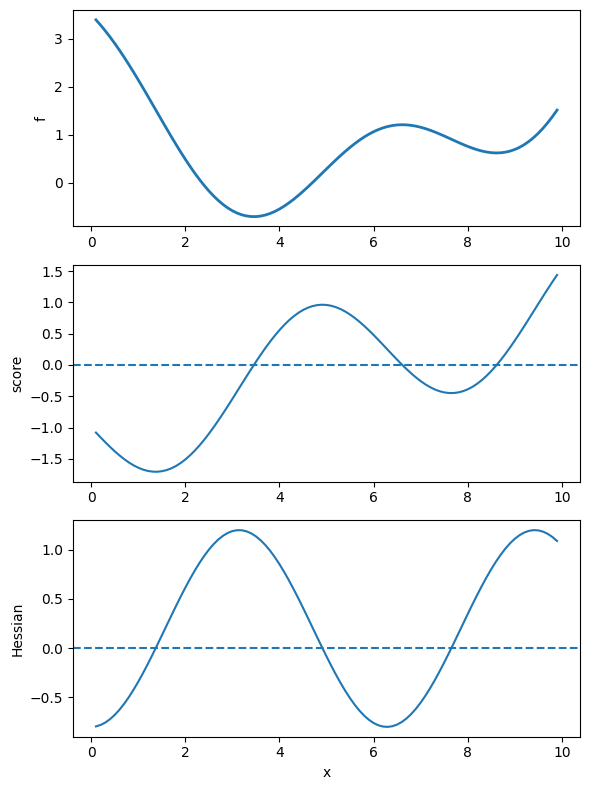

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# define functions
def f(x):
    return 0.1 * (x - 5) ** 2 + np.cos(x)

def s(x):
    return 0.2 * (x - 5) - np.sin(x)

def h(x):
    return 0.2 - np.cos(x)

# create x array
x_base = np.arange(0.1, 10, 0.1)

# create plots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

axs[0].plot(x_base, f(x_base), linewidth=2)
axs[0].set_ylabel('f')

axs[1].plot(x_base, s(x_base))
axs[1].axhline(y=0, linestyle='--')
axs[1].set_ylabel('score')

axs[2].plot(x_base, h(x_base))
axs[2].axhline(y=0, linestyle='--')
axs[2].set_ylabel('Hessian')
axs[2].set_xlabel('x')

plt.tight_layout()
plt.show()

### Iteartion

* Initial trial value $\theta_0$, 
* If $s(\theta_0) \neq 0$, updated by

$$
\theta_{t+1} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$

for the index of iteration $t=0,1,\cdots$
* $H(\theta) = \frac{ \partial s(\theta )}{ \partial \theta}$ is the Hessian. 


### Mechanism

* Taylor expansion
at $\theta_t$ round  $\theta_{\star}$, a root of $s(\cdot)$. Because $\theta_{ \star }$  is a root,

$$
0 = s(\theta_{\star}) = s(\theta_t) + H(\theta_t) (\theta_{\star} - \theta_t) + O( (\theta_{\star} - \theta_t)^2 ).
$$



### Update

* Ignore the high-order term and rearrange,

$$
\theta_{\star} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$ 

* iteration formula by replacing $\theta_{\star}$ with the updated $\theta_{t+1}$. 
* Iterate until $|\theta_{t+1} -\theta_{t}| < \epsilon$ (absolute criterion) and/or
$|\theta_{t+1} -\theta_{t}|/|\theta_{t}| < \epsilon$ (relative criterion), 
* $\epsilon$ is a small positive number chosen as a tolerance level.


In [36]:
def Newton(x):
    return x - s(x) / h(x)

In [37]:
x_init = 6 # can experiment with various initial values

gap = 1
epsilon = 0.001  # tolerance
while gap > epsilon:
    x_new = Newton(x_init)
    print(x_new)
    gap = abs(x_init - x_new)
    x_init = x_new

6.6306685575825846
6.611216774253945
6.611301507665787


## Features of Newton's Method


* It seeks the solution to $s(\theta) = 0$. 
* The first-order condition is necessary but not sufficient
* Verify the second-order condition
* Compare the value of multiple minima for global minimum

* It requires gradient $s(\theta)$ and the Hessian $H(\theta)$.
* It numerically converges at quadratic rate.

## Quasi-Newton Method

* Most well-known quasi-Newton algorithm is [BFGS](http://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
* It avoids explicit calculation of Hessian
* It starts from an initial (inverse) Hessian
* Updates Hessian by an explicit formula via quadratic approximation

## Derivative-Free Method

* [Nelder-Mead](http://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)
* Simplex method
* Search a local minimum 
  * reflection
  * expansion
  * contraction


### Example

* Pseudo Poisson maximum likelihood estimation (PPML)
* Popular estimator for cross-country bilateral trade
* Conditional mean model

$$
E[y_i | x_i] = \exp( x_i' \beta),
$$

### Poisson MLE

If $Z \sim Poisson(\lambda)$, then 

$$
\Pr(Z = k) = \frac{\mathrm{e}^{-\lambda} \lambda^k}{k!}, \mathrm{ for }\, \, k=0,1,2,\ldots,
$$

and the log-likelihood

$$
\log \Pr(Y = y | x) =  -\exp(x'\beta) + y\cdot x'\beta - \log k!
$$

* Log-likelihood function of the sample

$$
\ell(\beta) = \log \Pr( \mathbf{y} | \mathbf{x};\beta ) =
-\sum_{i=1}^n \exp(x_i'\beta) + \sum_{i=1}^n y_i x_i'\beta.
$$

* gradient

$$
s(\beta) =\frac{\partial \ell(\beta)}{\partial \beta} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i + \sum_{i=1}^n y_i x_i.
$$

* Hessian

$$
H(\beta) = \frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta'} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i x_i'
$$

is negative definite.

* $\ell(\beta)$ is strictly concave in $\beta$.

* Default optimization is minimization
* Use *negative* log-likelihood


In [38]:
def poisson_loglik(b):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    return ell


* Write the criterion as a function of the parameter to be optimized 
* Data can be fed inside or outside of the function.
  * If the data is provided as additional arguments, these arguments must be explicit.


In [ ]:
from scipy.optimize import minimize
import statsmodels.api as sm

## prepare the data
data = sm.datasets.get_rdataset('RecreationDemand', 'AER').data
y = data['trips']
X = data[['income']]
X = sm.add_constant(X)


In [ ]:
## estimation
b_init = [0, 1]  # initial value
b_hat_bfgs = minimize(poisson_loglik, b_init, method='BFGS', options={'gtol': 1e-7, 'disp': True})
b_hat_nm = minimize(poisson_loglik, b_init, method='Nelder-Mead', options={'xtol': 1e-7, 'disp': True})

print(f"BFGS: {b_hat_bfgs}")


         Current function value: 261.114078
         Iterations: 18
         Function evaluations: 75
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 261.114078
         Iterations: 83
         Function evaluations: 150
BFGS:   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 261.1140782953316
        x: [ 1.177e+00 -9.994e-02]
      nit: 18
      jac: [ 7.629e-06  2.670e-05]
 hess_inv: [[ 7.812e-05 -5.401e-05]
            [-5.401e-05  7.897e-05]]
     nfev: 75
     njev: 25


c:\Users\zhent\anaconda3\envs\pytorch\Lib\site-packages\scipy\optimize\_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)
C:\Users\zhent\AppData\Local\Temp\ipykernel_31648\819545667.py:4: OptimizeWarning: Unknown solver options: xtol
  b_hat_nm = minimize(poisson_loglik, b_init, method='Nelder-Mead', options={'xtol': 1e-7, 'disp': True})


In [ ]:
print(f"Nelder-Mead: {b_hat_nm}")

Nelder-Mead:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 261.11407845438714
             x: [ 1.177e+00 -9.993e-02]
           nit: 83
          nfev: 150
 final_simplex: (array([[ 1.177e+00, -9.993e-02],
                       [ 1.177e+00, -9.995e-02],
                       [ 1.177e+00, -9.995e-02]]), array([ 2.611e+02,  2.611e+02,  2.611e+02]))


### Alternative Formulation

* Nonlinear least squares (NLS) is also valid in theory.
* NLS minimizes

$$
\sum_{i=1}^n (y_i - \exp(x_i \beta))^2
$$

* Why PPML is preferred? 

* PPML's optimization for the linear index is globally convex.
* Numerical optimization of PPML is easier and more robust

### Caveats

* No algorithm suits all problems. 
* Simulation is helpful to check the accuracy of optimization
* Contour plot helps visualize the function surface/manifold

### Example

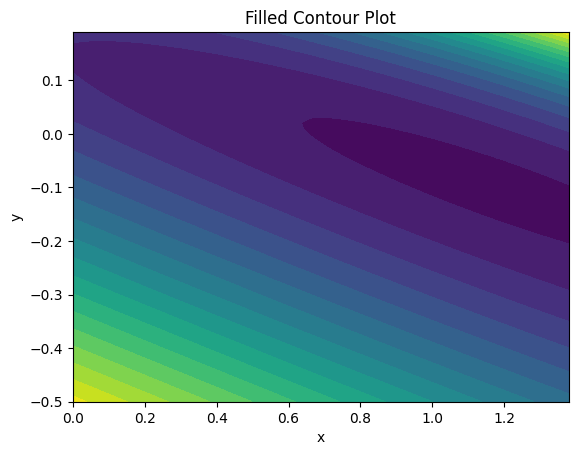

In [42]:
## generate contour plot
x_grid = np.arange(0, 1.4, 0.02)
x_length = len(x_grid)
y_grid = np.arange(-0.5, 0.2, 0.01)
y_length = len(y_grid)

z_contour = np.zeros((x_length, y_length))

for i in range(x_length):
    for j in range(y_length):
        z_contour[i, j] = poisson_loglik([x_grid[i], y_grid[j]])

## generate filled contour plot
plt.contourf(x_grid, y_grid, z_contour.T, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Filled Contour Plot')
plt.show()


### NLOPT

* Third-party standalone solvers 
* [`NLopt`](http://ab-initio.mit.edu/wiki/index.php/NLopt_Installation)
* [extensive list of algorithms](http://ab-initio.mit.edu/wiki/index.php/NLopt_Algorithms#SLSQP)
* Package [`nloptr`](http://cran.r-project.org/web/packages/nloptr/index.html)


### Example

We first carry out the Nelder-Mead algorithm in NLOPT.


In [ ]:
import nlopt

# Define the objective function with gradient for nlopt
def poisson_loglik_grad_nlopt(b, grad):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    if grad.size > 0:
        grad[:] = -(X.T @ (y - lambda_))
    return ell

# Set up the optimization problem
opt = nlopt.opt(nlopt.LD_LBFGS, X.shape[1]) # is the dimension of the parameter X.shape[1]
opt.set_min_objective(poisson_loglik_grad_nlopt)
opt.set_xtol_rel(1e-7)

# Set the initial parameter values
b_init = np.zeros(X.shape[1])

# Run the optimization
b_opt = opt.optimize(b_init)
minf = opt.last_optimum_value()

# Print the optimization result
print(f"Optimized parameters: {b_opt}")
print(f"Minimum value of the objective function: {minf}")

Optimized parameters: [ 1.17739744 -0.09993984]
Minimum value of the objective function: 261.1140782953287


c:\Users\zhent\anaconda3\envs\pytorch\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


To invoke BFGS in NLOPT, we must code up the gradient $s(\beta)$,
as in the human-written function `poisson.log.grad()`.

In [44]:
def poisson_loglik_grad(b):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * lambda_)
    grad = -(X.T @ (y - lambda_))
    return grad



## Gradient Descent in Neural Network

* In optimization we update the $D$-dimensional parameter

$$
\beta_{k+1} = \beta_{k} + a_k p_k,
$$

where $a_k \in \mathbb{R}$ is the step length and $p_k\in \mathbb{R}^D$ is a vector
of directions. 

* Use a Talyor expansion,

$$
f(\beta_{k+1}) = f(\beta_k + a_k p_k ) \approx f(\beta_k) + a_k \nabla f(\beta_k) p_k,
$$

* If in each step we want the value of the criterion function
$f(x)$ to decrease, we need $\nabla f(\beta_k) p_k \leq 0$.

* A simple choice is $p_k =-\nabla f(\beta_k)$, which is called the deepest decent.
* Newton's method corresponds to $p_k =- (\nabla^2 f(\beta_k))^{-1}  \nabla f(\beta_k)$.


In [45]:
import torch
import torch.optim as optim

# Remove the first column of X and convert to PyTorch tensor
X_tensor = torch.tensor(X.iloc[:, 1].values, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Define the model
class PoissonRegressionModel(torch.nn.Module):
    def __init__(self):
        super(PoissonRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(X_tensor.shape[1], 1)

    def forward(self, x):
        return torch.exp(self.linear(x))
    # y_hat = exp(b0 + b1 * x)

# Instantiate the model
model = PoissonRegressionModel()

# Define the loss function (negative log-likelihood)
def poisson_loss(y_hat, y_true):
    return torch.mean(y_hat - y_true * torch.log(y_hat))

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_hat = model(X_tensor).squeeze()
    loss = poisson_loss(y_hat, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the optimized parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Epoch [100/1000], Loss: 0.7545
Epoch [200/1000], Loss: 0.5082
Epoch [300/1000], Loss: 0.4202
Epoch [400/1000], Loss: 0.3998
Epoch [500/1000], Loss: 0.3966
Epoch [600/1000], Loss: 0.3963
Epoch [700/1000], Loss: 0.3962
Epoch [800/1000], Loss: 0.3962
Epoch [900/1000], Loss: 0.3962
Epoch [1000/1000], Loss: 0.3962
linear.weight tensor([[-0.0999]])
linear.bias tensor([1.1774])


In [ ]:
len(y_tensor) * loss.item()

261.1140068471432

### Stochastic Gradient Descent

* When the sample size is huge and the number of parameters is large,
Stochastic gradient descent (SGD) uses a small batch of the sample
to evaluate the gradient in each iteration. 

* SGD involves tuning parameters: the batch size and the learning rate. 

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create a dataset and data loader
dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 100
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in data_loader:
        optimizer.zero_grad()
        y_hat = model(batch_X).squeeze()
        loss = poisson_loss(y_hat, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the optimized parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Epoch [100/1000], Loss: 0.8033
Epoch [200/1000], Loss: -0.6293
Epoch [300/1000], Loss: -0.7361
Epoch [400/1000], Loss: 1.1264
Epoch [500/1000], Loss: 0.6740
Epoch [600/1000], Loss: -0.4765
Epoch [700/1000], Loss: -0.7431
Epoch [800/1000], Loss: 0.2962
Epoch [900/1000], Loss: 0.4412
Epoch [1000/1000], Loss: 0.0221
linear.weight tensor([[-0.1009]])
linear.bias tensor([1.1691])


## Convex Optimization

* Local minimum is a global minimum.
* Particularly important in high-dimensional problems
* [Boyd and Vandenberghe (2004)](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
* "Convex optimization is technology; all other optimizations are arts."

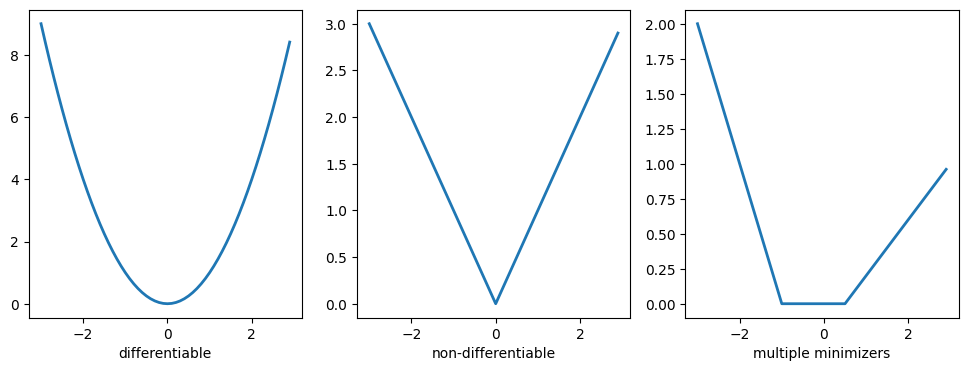

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define the functions
f1 = lambda x: x ** 2
f2 = lambda x: np.abs(x)
f3 = lambda x: np.where(x <= -1, (-x - 1), np.where(x >= 0.5, 0.4 * x - 0.2, 0))

# Set up the plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot f1
x_base = np.arange(-3, 3, 0.1)
axs[0].plot(x_base, f1(x_base), lw=2)
axs[0].set_xlabel('differentiable')

# Plot f2
axs[1].plot(x_base, f2(x_base), lw=2)
axs[1].set_xlabel('non-differentiable')

# Plot f3
axs[2].plot(x_base, f3(x_base), lw=2)
axs[2].set_xlabel('multiple minimizers')
plt.show()


### Example

* Linear regression model MLE


* Normal MLE. The (negative) log-likelihood 

$$
\ell (\beta, \sigma) = \log \sigma + \frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - x_i' \beta)^2
$$

is not convex

* Re-parameterize the criterion function by $\gamma = 1/\sigma$ and $\alpha = \beta / \sigma$, then

$$
\ell (\alpha, \gamma) = -\log \gamma + \frac{1}{2}
\sum_{i=1}^n (\gamma y_i - x_i' \alpha)^2
$$

is convex in $\alpha, \gamma$

* Many MLE estimators in econometric textbooks are convex. 